In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [68]:
menu_df = pd.read_csv("menu_preprocessed.csv")

C:\Users\lucmi\anaconda3\envs\min_ds-env\lib\site-packages\IPython\core\interactiveshell.py:3194: DtypeWarning: Columns (1,2,4,5,6,7,10,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [69]:
menu_df.shape

(1505334, 17)

In [50]:
df = pd.read_csv("store_info.csv").drop_duplicates(subset='DetailUrl')
df = df.drop(columns = ['Unnamed: 0','SpecialDesc','FriendAction', 
                        'City', 'Phone', 'AvgRatingOriginal', 'BankCards',
                        'AlbumUrl', 'Location', 'Status','IconUrl', 'CategoryGroupKey',
                       'HasAlredyAddedToList','PromotionPlainTitle', 'IsAd',
                       'DocumentType',])

C:\Users\lucmi\anaconda3\envs\min_ds-env\lib\site-packages\IPython\core\interactiveshell.py:3194: DtypeWarning: Columns (37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df['TotalReview'] = df['TotalReview'].astype('int')
df['TotalView'] = df['TotalView'].astype('int')
df['TotalFavourite'] = df['TotalFavourite'].astype('int')
df['TotalCheckins'] = df['TotalCheckins'].astype('int')

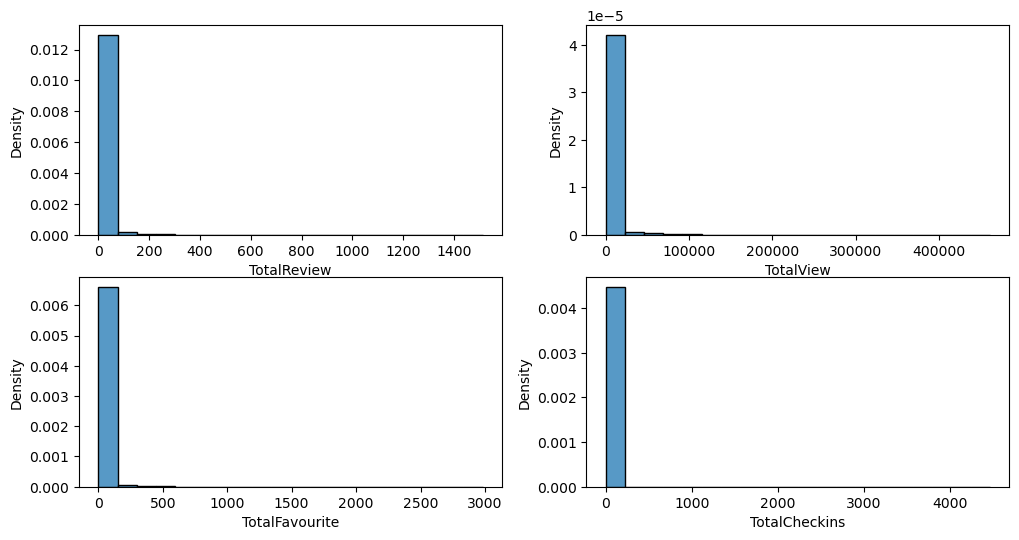

In [4]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(12,6))
sns.histplot(df,stat='density',x='TotalReview',ax=axs[0,0],bins=20);
sns.histplot(df,stat='density',x='TotalView',ax=axs[0,1],bins=20);
sns.histplot(df,stat='density',x='TotalFavourite',ax=axs[1,0],bins=20);
sns.histplot(df,stat='density',x='TotalCheckins',ax=axs[1,1],bins=20);

In [5]:
df['AvgRating'] = df['AvgRating'].str.replace('_._','nan',regex=False).astype('float32')

<AxesSubplot:xlabel='AvgRating', ylabel='Density'>

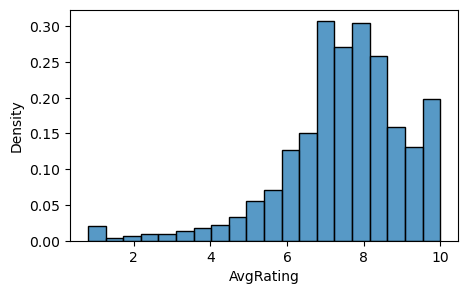

In [6]:
fig, axs = plt.subplots(ncols=1,figsize=(5,3))
sns.histplot(df,stat='density',x='AvgRating',ax=axs,bins=20)

In [7]:
df.columns

Index(['Address', 'District', 'Promotions', 'Cuisines', 'TotalReview',
       'TotalView', 'TotalFavourite', 'TotalCheckins', 'AvgRating',
       'ReviewUrl', 'Latitude', 'Longitude', 'MainCategoryId', 'PictureCount',
       'Status', 'IconUrl', 'HasAlredyAddedToList', 'AdsProviders',
       'DistrictId', 'DistrictUrl', 'CategoryGroupKey', 'Distance',
       'HasBooking', 'HasDelivery', 'BookingUrl', 'DeliveryUrl', 'BranchUrl',
       'BranchName', 'Location', 'TotalReviewsFormat', 'TotalPictures',
       'TotalPicturesFormat', 'TotalSaves', 'Reviews', 'ReviewsTest',
       'IsOpening', 'HasVideo', 'MasterCategoryId', 'Services', 'Floor',
       'Categories', 'BookingMobileUrl', 'PromotionPlainTitle', 'Id', 'Name',
       'UrlRewriteName', 'PicturePath', 'PicturePathLarge',
       'MobilePicturePath', 'DetailUrl', 'DocumentType', 'ShowInSearchResult',
       'IsAd', 'SubItems'],
      dtype='object')

In [67]:
df['ShowInSearchResult'].unique()

array([False,  True])

In [8]:
def services_getter(x):
    if type(x) == float or pd.isnull(x) or x =="":
        return x
    x = ast.literal_eval(x)
    rslt = []
    for i in x:
        rslt.append(i['Text'])
    return rslt

In [9]:
df['Services'] = df['Services'].apply(lambda x: services_getter(x))
df['Cuisines'] = df['Cuisines'].apply(lambda x: [i['Name'] for i in ast.literal_eval(x)])
df['HasDelivery'].unique()
df['HasBooking'].unique()
df['Categories'] = df['Categories'].apply(lambda x: [i['Name'] for i in ast.literal_eval(x)])

<AxesSubplot:xlabel='TotalView', ylabel='Services'>

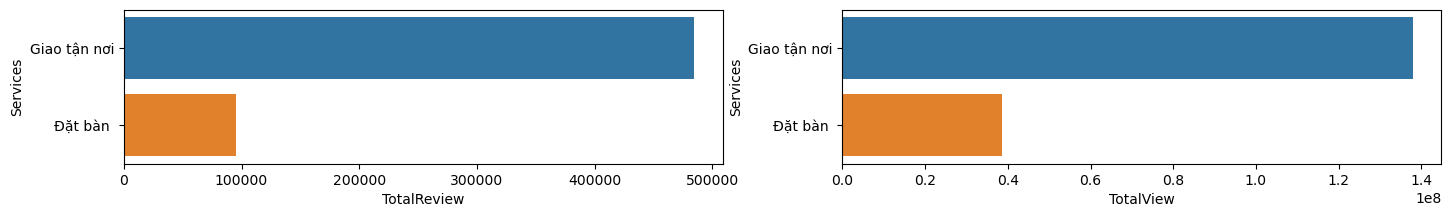

In [21]:
type_df = df.explode('Services')
type_df = type_df.groupby('Services')[['TotalReview','TotalView']].agg('sum')
type_df = type_df.sort_values('TotalReview',ascending=False)
type_df = type_df.reset_index()
fig, axs = plt.subplots(ncols=2,figsize=(17,2))
sns.barplot(data=type_df[:10],x='TotalReview',ax=axs[0],y='Services',orient='h')
sns.barplot(data=type_df[:10],x='TotalView',ax=axs[1],y='Services',orient='h')

<AxesSubplot:xlabel='TotalReview', ylabel='Cuisines'>

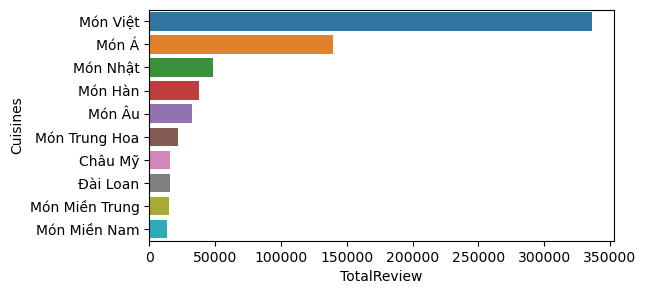

In [29]:
type_df = df.explode('Cuisines')
type_df = type_df.groupby('Cuisines')[['TotalReview','TotalView']].agg('sum')
type_df = type_df.sort_values('TotalReview',ascending=False)
type_df = type_df.reset_index()
fig, axs = plt.subplots(ncols=1,figsize=(6,3))
sns.barplot(data=type_df[:10],x='TotalReview',ax=axs,y='Cuisines',orient='h')

<AxesSubplot:xlabel='TotalView', ylabel='Cuisines'>

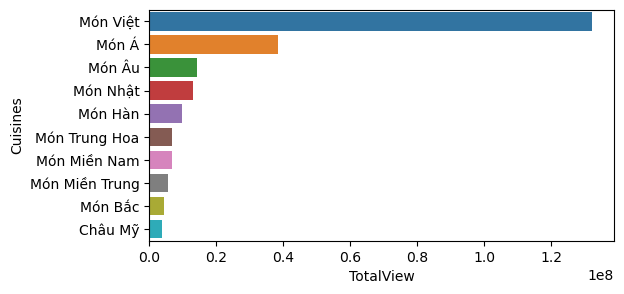

In [33]:
fig, axs = plt.subplots(ncols=1,figsize=(6,3))
sns.barplot(data=type_df.sort_values('TotalView',ascending=False)[:10],x='TotalView',ax=axs,y='Cuisines',orient='h')

<AxesSubplot:xlabel='TotalReview', ylabel='Categories'>

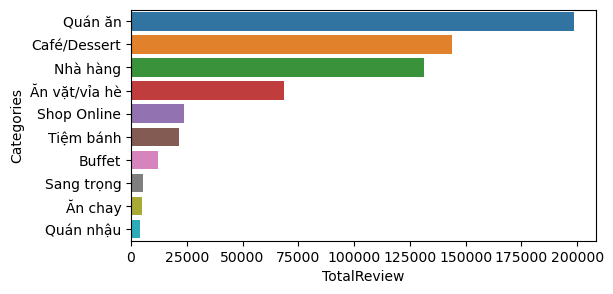

In [46]:
type_df = df.explode('Categories')
type_df = type_df.groupby(['Categories'])[['TotalReview','TotalView']].agg('sum')
type_df = type_df.sort_values('TotalReview',ascending=False)
type_df = type_df.reset_index()
fig, axs = plt.subplots(ncols=1,figsize=(6,3))
sns.barplot(data=type_df[:10],x='TotalReview',ax=axs,y='Categories',orient='h')

<AxesSubplot:xlabel='TotalView', ylabel='Categories'>

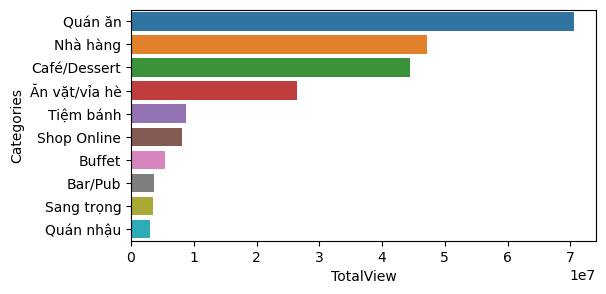

In [47]:
fig, axs = plt.subplots(ncols=1,figsize=(6,3))
sns.barplot(data=type_df.sort_values('TotalView',ascending=False)[:10],x='TotalView',ax=axs,y='Categories',orient='h')

In [49]:
df['Status'].unique()

array([2], dtype=int64)